# Pulling Data from Wikipedia


## Getting World Cup Winners from Wikipedia
Let's look at a more complicated example:

https://en.wikipedia.org/wiki/List_of_FIFA_World_Cup_finals

How can we get the list of World Cup winners from this page?  The structure is a bit more complicated, with symbols and images getting in the way.


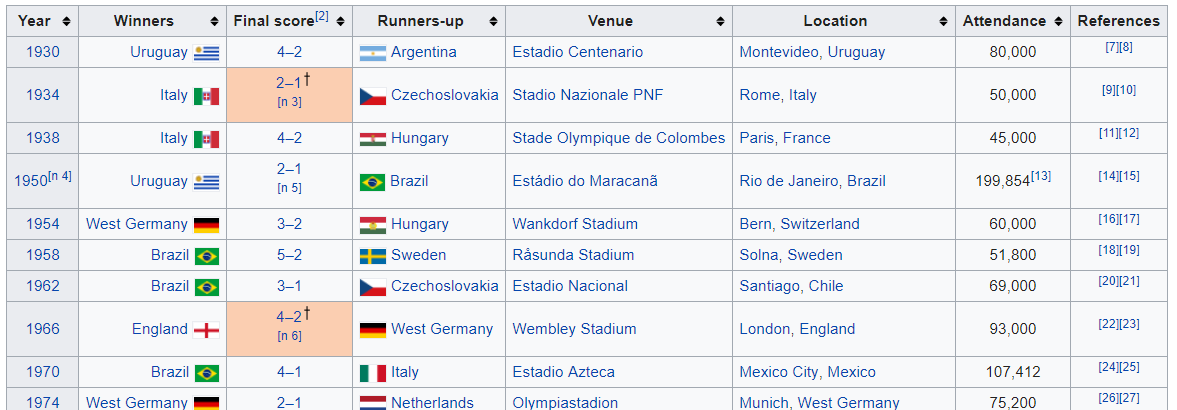

### 1. Understand the page structure
Again, I will view the page source in the browser and search for the start of the table.  If I search for "Uruguay" I get lots of hits, so I will search for something which more uniquely pinpoints the start of the table, e.g. "Estadio Centenario":

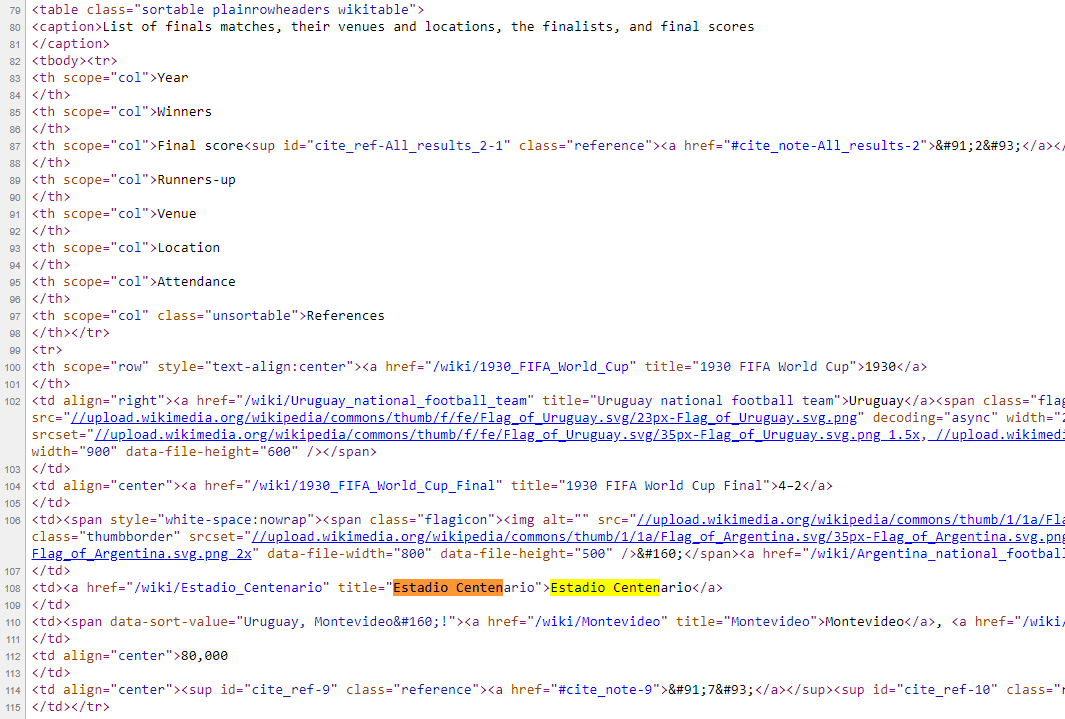

### 2. Write some code to deconstruct the page 
Again, I'll use our generic table scraper code:

In [6]:
from bs4 import *
import urllib3
import pandas as pd
from scrape_helper import *

### 3. Pull the data from the web page and call the table extraction code

In [7]:
# World Cup winners from Wikipedia
url = "https://en.wikipedia.org/wiki/List_of_FIFA_World_Cup_finals"
http = urllib3.PoolManager()
response = http.request('GET', url)
page = BeautifulSoup(response.data, "lxml")

# Extract table
table = page.find('table', {'class': 'sortable plainrowheaders wikitable'})
df = tableToDataFrame(table)
df

,Index,Year,Winners,Score,Runners-up,Venue,Location,Attendance,Refs
0,,1930,Uruguay,4–2,Argentina,Estadio Centenario,"Montevideo, Uruguay","80,000",[7][8]
1,,1934,Italy,2–1[n 3],Czechoslovakia,Stadio Nazionale PNF,"Rome, Italy","50,000",[9][10]
2,,1938,Italy,4–2,Hungary,Stade Olympique de Colombes,"Colombes (Paris), France","45,000",[11][12]
3,,1942,Editions not played because of World War II.,,,,,,
4,,1946,,,,,,,
5,,1950[n 4],Uruguay,2–1[n 5],Brazil,Estádio do Maracanã,"Rio de Janeiro, Brazil","199,854[13]",[14][15]
6,,1954,West Germany,3–2,Hungary,Wankdorf Stadium,"Bern, Switzerland","60,000",[16][17]
7,,1958,Brazil,5–2,Sweden,Råsunda Stadium,"Solna (Stockholm), Sweden","51,800",[18][19]
8,,1962,Brazil,3–1,Czechoslovakia,Estadio Nacional,"Santiago, Chile","69,000",[20][21]
9,,1966,England,4–2[n 6],West Germany,Wembley Stadium,"London, England","96,924",[22][23]


The references in square brackets get in the way, so let's remove them:

In [8]:
def stripReference(text):
    # Remove any references
    f = text.find("[")
    if f>=0:
        text = text[:f]
    return text

In [9]:
df = df.applymap(stripReference)
df

,Index,Year,Winners,Score,Runners-up,Venue,Location,Attendance,Refs
0,,1930,Uruguay,4–2,Argentina,Estadio Centenario,"Montevideo, Uruguay","80,000",
1,,1934,Italy,2–1,Czechoslovakia,Stadio Nazionale PNF,"Rome, Italy","50,000",
2,,1938,Italy,4–2,Hungary,Stade Olympique de Colombes,"Colombes (Paris), France","45,000",
3,,1942,Editions not played because of World War II.,,,,,,
4,,1946,,,,,,,
5,,1950,Uruguay,2–1,Brazil,Estádio do Maracanã,"Rio de Janeiro, Brazil","199,854",
6,,1954,West Germany,3–2,Hungary,Wankdorf Stadium,"Bern, Switzerland","60,000",
7,,1958,Brazil,5–2,Sweden,Råsunda Stadium,"Solna (Stockholm), Sweden","51,800",
8,,1962,Brazil,3–1,Czechoslovakia,Estadio Nacional,"Santiago, Chile","69,000",
9,,1966,England,4–2,West Germany,Wembley Stadium,"London, England","96,924",


In [10]:
# Eurovision winners from Wikipedia
url = "https://en.wikipedia.org/wiki/List_of_Eurovision_Song_Contest_winners"
http = urllib3.PoolManager()
response = http.request('GET', url)
page = BeautifulSoup(response.data, "lxml")
table = page.find('table', {'class': 'wikitable'})
df = tableToDataFrame(table)

Notice how the data from 1969 gets messed up.  This is because we have a column that spans many rows.  This would have to be handled.  Can you think how this could be done?

In [11]:
df.head(20)

,Index,Year,Host City,Date,Winner,Song,Performer(s),Songwriter(s),Language,Running order (in final),Points
0,,1956,Lugano,24 May,Switzerland,"""Refrain""",Lys Assia,Géo VoumardÉmile Gardaz,French,09/14,Not announced
1,,1957,Frankfurt,3 March,Netherlands,"""Net als toen""",Corry Brokken,Guus JansenWilly van Hemert,Dutch,06/10,31
2,,1958,Hilversum,12 March,France,"""Dors, mon amour""",André Claveau,Hubert GiraudPierre Delanoë,French,03/10,27
3,,1959,Cannes,11 March,Netherlands,"""Een beetje""",Teddy Scholten,Dick SchalliesWilly van Hemert,Dutch,05/11,21
4,,1960,London,29 March,France,"""Tom Pillibi""",Jacqueline Boyer,André PoppPierre Cour,French,13/13,32
5,,1961,Cannes,18 March,Luxembourg,"""Nous les amoureux""",Jean-Claude Pascal,Jacques DatinMaurice Vidalin,French,14/16,31
6,,1962,Luxembourg,18 March,France,"""Un premier amour""",Isabelle Aubret,Claude-Henri VicRoland Valade,French,09/16,26
7,,1963,London,23 March,Denmark,"""Dansevise""",Grethe and Jørgen Ingmann,Otto FranckerSejr Volmer-Sørensen,Danish,08/16,42
8,,1964,Copenhagen,21 March,Italy,"""Non ho l'età""",Gigliola Cinquetti,Nicola SalernoMario Panzeri,Italian,12/16,49
9,,1965,Naples,20 March,Luxembourg,"""Poupée de cire, poupée de son""",France Gall,Serge Gainsbourg,French,15/18,32


## Your turn>>>
See if you can extract a Pandas dataframe from one of the following web pages:

Nobel Prize Winners
https://en.wikipedia.org/wiki/List_of_Nobel_laureates

Weather Records
https://en.wikipedia.org/wiki/List_of_weather_records

Planets
https://en.wikipedia.org/wiki/Planet

